In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea

In [2]:
df = pd.read_csv('Netflix Userbase.csv',encoding = ' unicode_escape')

In [3]:
df.shape

(2500, 10)

In [4]:
df.head(10)

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
5,6,Premium,15,18-03-22,27-06-23,France,29,Female,Smart TV,1 Month
6,7,Standard,12,09-12-21,25-06-23,Brazil,46,Male,Tablet,1 Month
7,8,Basic,10,02-04-23,24-06-23,Mexico,39,Female,Laptop,1 Month
8,9,Standard,12,20-10-22,23-06-23,Spain,37,Male,Smartphone,1 Month
9,10,Premium,15,07-01-23,22-06-23,Italy,44,Female,Smart TV,1 Month


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [6]:
df.isnull().sum()

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

In [7]:
df.rename(columns={'Subscription Type': 'Subscription', 'Join Date': 'Membership Start Date'}, inplace=True)

In [8]:
from dateutil import parser

#creating a user defined function to parse any kind of formats of datetime
def parse_date(date_string):
    formats = ['%d-%m-%Y', '%d/%m/%Y', '%Y-%m-%d']  # Add more formats as needed
    return pd.to_datetime(date_string, errors='coerce')  # Fall back to default parsing

# Apply the custom parsing function
df['Membership Start Date'] = df['Membership Start Date'].apply(parse_date)
df['Last Payment Date'] = df['Last Payment Date'].apply(parse_date)

# Verify the changes
print(df[['Membership Start Date', 'Last Payment Date']].head())


  Membership Start Date Last Payment Date
0            2022-01-15        2023-10-06
1            2021-05-09        2023-06-22
2            2023-02-28        2023-06-27
3            2022-10-07        2023-06-26
4            2023-01-05        2023-06-28


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   User ID                2500 non-null   int64         
 1   Subscription           2500 non-null   object        
 2   Monthly Revenue        2500 non-null   int64         
 3   Membership Start Date  2500 non-null   datetime64[ns]
 4   Last Payment Date      2500 non-null   datetime64[ns]
 5   Country                2500 non-null   object        
 6   Age                    2500 non-null   int64         
 7   Gender                 2500 non-null   object        
 8   Device                 2500 non-null   object        
 9   Plan Duration          2500 non-null   object        
dtypes: datetime64[ns](2), int64(3), object(5)
memory usage: 195.4+ KB


In [10]:
df.columns

Index(['User ID', 'Subscription', 'Monthly Revenue', 'Membership Start Date',
       'Last Payment Date', 'Country', 'Age', 'Gender', 'Device',
       'Plan Duration'],
      dtype='object')

In [11]:
df.describe()

,User ID,Monthly Revenue,Membership Start Date,Last Payment Date,Age
count,2500.00000,2500.000000,2500,2500,2500.000000
mean,1250.50000,12.508400,2022-07-30 08:06:43.200000,2023-06-21 10:33:36,38.795600
min,1.00000,10.000000,2021-05-09 00:00:00,2023-01-07 00:00:00,26.000000
25%,625.75000,11.000000,2022-06-15 00:00:00,2023-05-07 00:00:00,32.000000
50%,1250.50000,12.000000,2022-08-07 00:00:00,2023-06-28 00:00:00,39.000000
75%,1875.25000,14.000000,2022-10-09 00:00:00,2023-08-07 00:00:00,45.000000
max,2500.00000,15.000000,2023-12-01 00:00:00,2023-12-07 00:00:00,51.000000
std,721.83216,1.686851,NaN,NaN,7.171778


In [12]:
df.drop_duplicates(inplace=True)

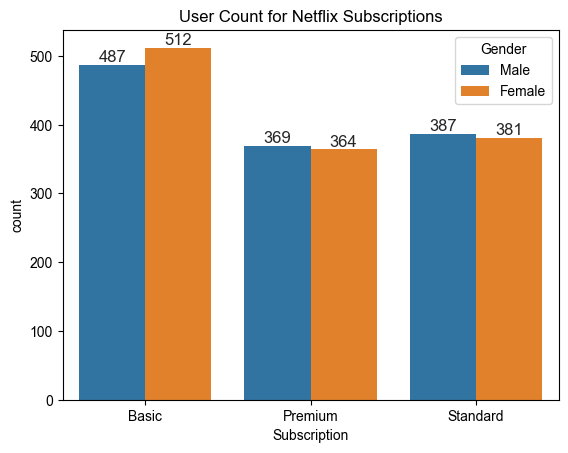

In [13]:
a = sea.countplot(x= 'Subscription', hue= 'Gender',  data = df)

#to adjust the size of graph
sea.set(rc={'figure.figsize' : (10,5)}) 

#to add data labels
for bars in a.containers:
    a.bar_label(bars)

#to add title
plt.title('User Count for Netflix Subscriptions')
plt.show()

In [14]:
#The graph above illustrates the total number of Netflix users categorized by their subscriptions. Notably, the Basic Subscription service has the highest user count and most of the users are Male.

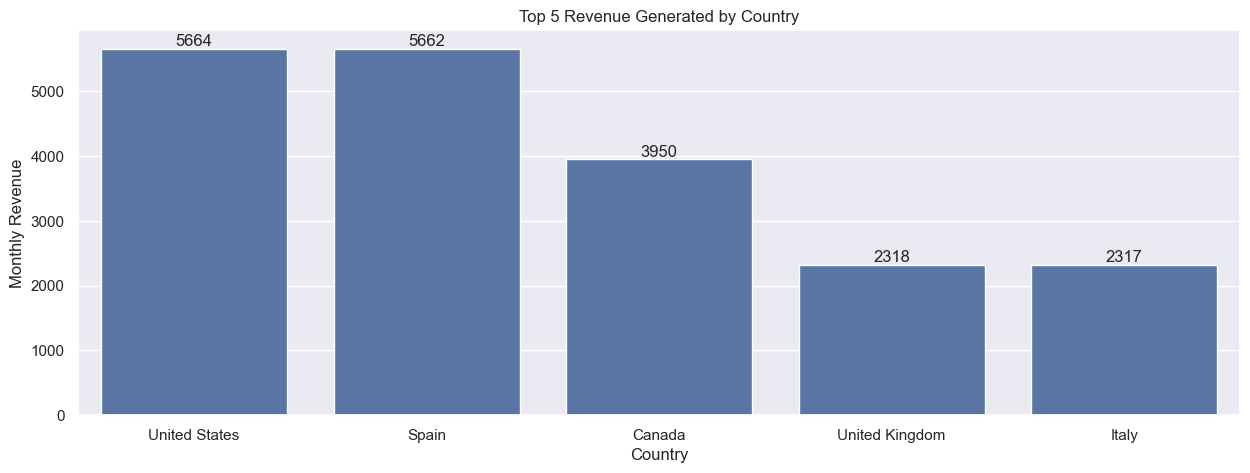

In [15]:
#Grouping
Revenue = df.groupby(['Country'], as_index=False)['Monthly Revenue'].sum().sort_values(by='Monthly Revenue', ascending=False)
#to adjust the size of graph
sea.set(rc={'figure.figsize' : (15,5)})
#To get top 5 Countries
Top_5_Revenue = Revenue.head(5) 
ax = sea.barplot(data=Top_5_Revenue, x='Country', y='Monthly Revenue')

# Adding labels to each bar
for bars in ax.containers:
    ax.bar_label(bars)

# Display the plot
plt.title('Top 5 Revenue Generated by Country')
plt.xlabel('Country')
plt.ylabel('Monthly Revenue')

plt.show()




In [16]:
#The graph above illustrates the top revenue generated by country, with the United States yielding the highest revenue for Netflix. Consequently, the majority of users are located in the United States.

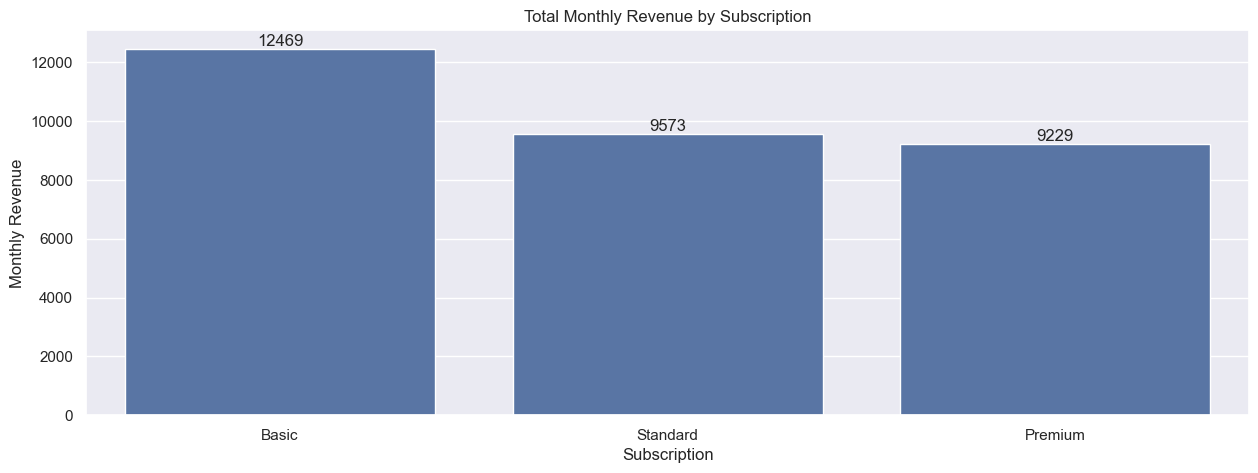

In [17]:
# Grouping
Revenue = df.groupby(['Subscription'], as_index=False)['Monthly Revenue'].sum().sort_values(by='Monthly Revenue', ascending=False)

# Adjusting the size of the graph
sea.set(rc={'figure.figsize': (15, 5)})

# Creating the bar plot
ax = sea.barplot(data=Revenue, x='Subscription', y='Monthly Revenue')

# Adding labels to each bar
for bars in ax.containers:
    ax.bar_label(bars)

# Adding title and labels
plt.title('Total Monthly Revenue by Subscription')
plt.xlabel('Subscription')
plt.ylabel('Monthly Revenue')

# Display the plot
plt.show()


In [18]:
#The graph above displays the total revenue generated by subscription type, with the Basic subscription generating the highest revenue on Netflix. This subscription is considered the most suitable and ideal option for all users.

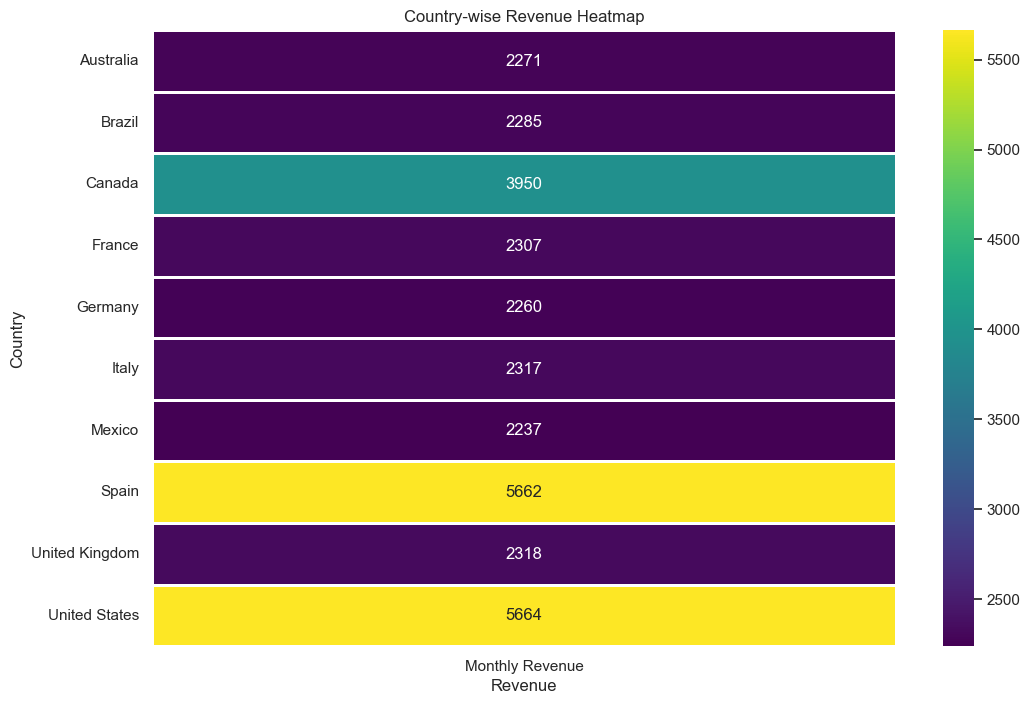

In [19]:

# Group the data by country and calculate total monthly revenue
revenue_by_country = df.groupby('Country', as_index=False)['Monthly Revenue'].sum()

# Pivoting the data to create a matrix format suitable for a heatmap
heatmap_data = revenue_by_country.pivot_table(index='Country', values='Monthly Revenue', fill_value=0)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
#formatting
sea.heatmap(heatmap_data,annot=True, fmt='.0f', cmap='viridis', linewidths=1)

# Adding titles and labels
plt.title('Country-wise Revenue Heatmap')
plt.xlabel('Revenue')
plt.ylabel('Country')

# Display the heatmap
plt.show()


In [20]:
#The graph above presents a heatmap illustrating the total revenue generated by country, with the United States showing the highest revenue.

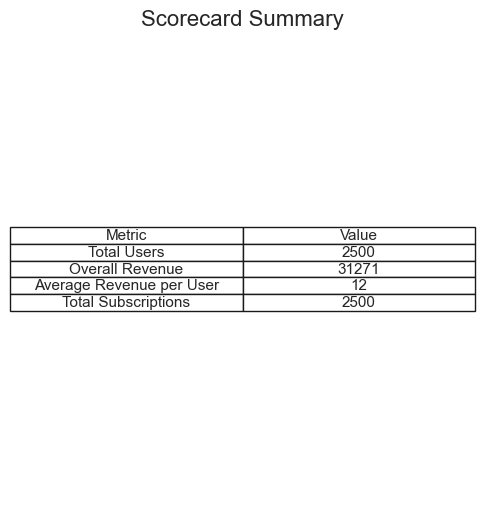

In [21]:
# Calculate key metrics for the scorecard
Total_Users = df['User ID'].count()
Total_Revenue = df['Monthly Revenue'].sum()
Average_Revenue_per_User = Total_Revenue / Total_Users
Total_Subscriptions = df['Subscription'].count()  # Changed to Total_Subscriptions for clarity

# Create a DataFrame for the scorecard
Data = {
    'Metric': ['Total Users', 'Overall Revenue', 'Average Revenue per User', 'Total Subscriptions'],
    'Value': [Total_Users, int(Total_Revenue), int(Average_Revenue_per_User), Total_Subscriptions]
}

scorecard_df = pd.DataFrame(Data)  # Create DataFrame

# Create a figure for the scorecard
plt.figure(figsize=(6, 6))  # Adjust the figure size

# Hide axes
plt.axis('off')

# Create the table
plt.table(cellText=scorecard_df.values, colLabels=scorecard_df.columns, cellLoc='center', loc='center')

# Title with reduced spacing
plt.title('Scorecard Summary', fontsize=16, pad=9)  # Adjust 'pad' to reduce space

# Show the scorecard
plt.show()


In [22]:
#The graph above presents a table containing all relevant summary details.